In [1]:
import numpy as np
import ten
import ipywidgets as widgets
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ["svg"]
import quimb.tensor as qtn
import itertools

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


$$
H = - \sum_{\braket{ij}} \sigma_z^i \sigma_z^j
$$

In [2]:
def W(temp: float, dtype=np.float32) -> np.ndarray:
	return np.array([
		[np.sqrt(np.cosh(1/temp)), np.sqrt(np.sinh(1/temp))],
		[np.sqrt(np.cosh(1/temp)), -np.sqrt(np.sinh(1/temp))],
	], dtype=dtype)

In [3]:
def T(temp: float, dtype=np.float32) -> np.ndarray:
	w = W(temp, dtype)
	return np.einsum("al,ar,au,ad->lrud", w, w, w, w)

In [4]:
temperature = widgets.FloatSlider(min=2, max=5)
temperature

FloatSlider(value=2.0, max=5.0, min=2.0)

In [5]:
t = T(temperature.value)

In [6]:
def ising_z(n: int, cyclic: bool = True):
	tn = None

	for i,j in itertools.product(range(n), range(n)):
		t = qtn.Tensor(
			data=T(temperature.value),
			inds=[f"hi{i}j{j}", f"hi{i}j{(j+1) % n}", f"vi{i}j{j}", f"vi{(i+1) % n}j{j}"],
			tags=[f"i{i}", f"j{j}"]
		)

		tn = t if tn is None else tn | t

	return tn

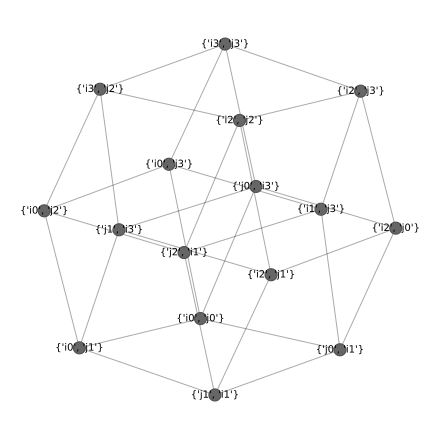

In [7]:
tn = ising_z(4)
tn.graph()

In [8]:
tn.contract()

26839088.0